**This notebook includes the following sections:**

#01 Importing libraries and data

#02 The Elbow Technique

#03 Running K-meas

#04 Plotting data

#05 Descriptive statistics and interpretation

**#01 Importing libraries and data**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [6]:
#Importing data
path = '/Users/gingermoore/Documents/06-2025 Airbnb Dallas/02 Data/Transformed Data/CleanDallasDataFinal.pkl'
df = pd.read_pickle(os.path.join(path))

In [10]:
pd.set_option('display.max_columns', None) #This ensures I can see all of my columns
df.head()

listing_id                           name  \
0      61878  MODERN LIVING AND FURNISHINGS   
1      61878  MODERN LIVING AND FURNISHINGS   
2      61878  MODERN LIVING AND FURNISHINGS   
3      61878  MODERN LIVING AND FURNISHINGS   
4      61878  MODERN LIVING AND FURNISHINGS   

                                         description  \
0  Close to downtown and Uptown.  Fast and conven...   
1  Close to downtown and Uptown.  Fast and conven...   
2  Close to downtown and Uptown.  Fast and conven...   
3  Close to downtown and Uptown.  Fast and conven...   
4  Close to downtown and Uptown.  Fast and conven...   

                               neighborhood_overview host_id host_since  \
0  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
1  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
2  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
3  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   
4  Enjoy the heart of Dallas right out your door ...  300211 2010-11-26   

  host_location  host_response_time  host_response_rate  host_acceptance_rate  \
0   Roanoke, TX  within a few hours               100.0                  88.0   
1   Roanoke, TX  within a few hours               100.0                  88.0   
2   Roanoke, TX  within a few hours               100.0                  88.0   
3   Roanoke, TX  within a few hours               100.0                  88.0   
4   Roanoke, TX  within a few hours               100.0                  88.0   

  host_neighbourhood    district  latitude  longitude property_type  \
0           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
1           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
2           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
3           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   
4           Oak Lawn  District 2   32.8169  -96.82018  Entire condo   

         room_type  accommodates  bathrooms  bedrooms  beds  min_nights  \
0  Entire home/apt             3        1.0       1.0   2.0          30   
1  Entire home/apt             3        1.0       1.0   2.0          30   
2  Entire home/apt             3        1.0       1.0   2.0          30   
3  Entire home/apt             3        1.0       1.0   2.0          30   
4  Entire home/apt             3        1.0       1.0   2.0          30   

   max_nights  number_of_reviews  rating_score  accuracy_score  clean_score  \
0        1125                 56          4.71            4.79          4.6   
1        1125                 56          4.71            4.79          4.6   
2        1125                 56          4.71            4.79          4.6   
3        1125                 56          4.71            4.79          4.6   
4        1125                 56          4.71            4.79          4.6   

   checkin_score  comm_score  location_score  value_score  host_listings  \
0           4.85        4.93            4.75         4.78              1   
1           4.85        4.93            4.75         4.78              1   
2           4.85        4.93            4.75         4.78              1   
3           4.85        4.93            4.75         4.78              1   
4           4.85        4.93            4.75         4.78              1   

   host_entire_homes  host_private_rooms  host_shared_rooms  \
0                  1                   0                  0   
1                  1                   0                  0   
2                  1                   0                  0   
3                  1                   0                  0   
4                  1                   0                  0   

   reviews_per_month superhost_bool  instant_book_bool       date  price  \
0               0.32           True              False 2025-04-17   75.0   
1               0.32           True              False 2025-04-18   75.0   
2               0.32       

In [12]:
#making sure my graphs show
%matplotlib inline

In [14]:
#Creating df with only numerical columns
df_2 = df.select_dtypes(include=[np.number])

In [16]:
#My algorithms won't accept null values, so I have to drop those
df_final = df_2.dropna()

In [31]:
#Now to scale the data so I can get on with the rest of the task!
sc = StandardScaler()
scaled = sc.fit_transform(df_final)
df_scaled = pd.DataFrame(scaled, columns=df_final.columns)

**#02 The Elbow Technique**

In [35]:
num_cl = range(1, 10) #creating the range for the number of clusters to create
kmeans = [KMeans(n_clusters=i) for i in num_cl] #defines clusters within the range just set

In [37]:
#Running k-means to create the clusters
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]
score

[-36643175.99999904,
 -32667858.677550875,
 -27925430.12981098,
 -25756273.449723758,
 -24839774.55947609,
 -23584677.82031115,
 -22010353.392640714,
 -19904252.76904778,
 -19073272.10770366]

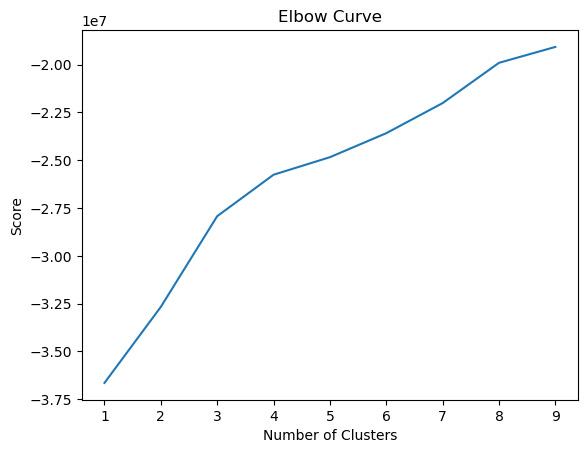

In [39]:
#Plot the scores using pylab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on this data, I'm going to go with 4 clusters. That's where the rate of increase starts to level off a little.

**#03 Running K-means**

In [43]:
#Create k-means object
kmeans = KMeans(n_clusters = 4)

In [45]:
#Fit k-means object to data
kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [47]:
#Creating new columns to demonstrate clusters, setting it on original data, not scaled data
df_final['clusters'] = kmeans.fit_predict(df_scaled)

/var/folders/dt/_2cmd91j32bgtvjmx8m320w40000gn/T/ipykernel_2494/1672803512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['clusters'] = kmeans.fit_predict(df_scaled)


In [49]:
df_final['clusters'].value_counts()

clusters
3    890604
1    441285
0    176295
2     18615
Name: count, dtype: int64

**#04 Plotting data**

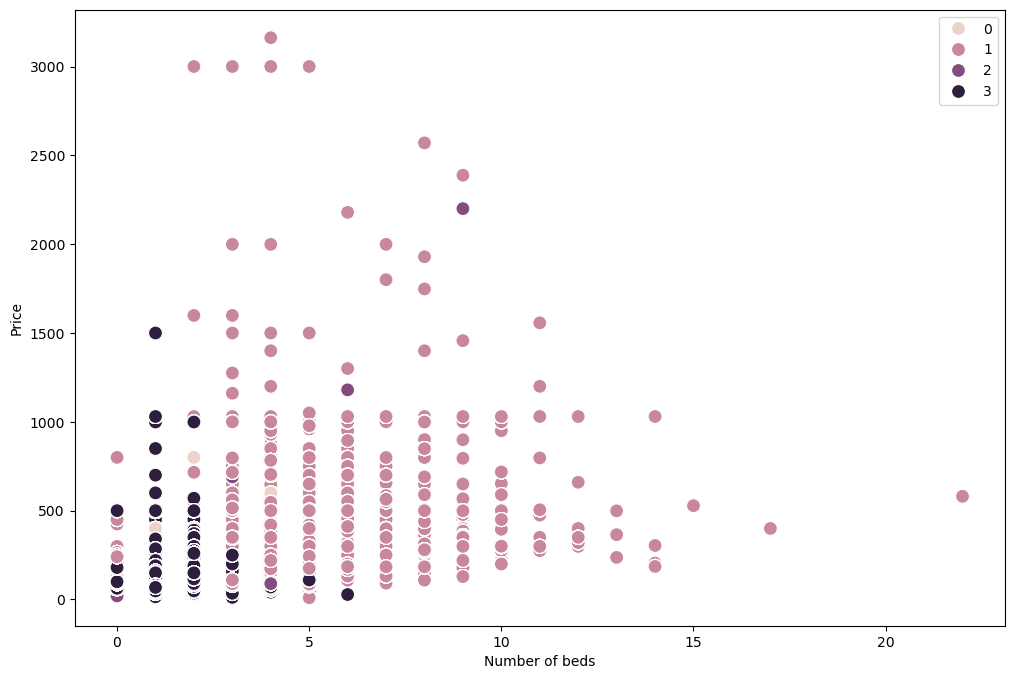

In [52]:
#Let's start with a scatterplot--beds vs. price
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_final['beds'], y=df_final['price'], hue=kmeans.labels_, s=100)
ax.grid(False)
plt.xlabel('Number of beds')
plt.ylabel('Price')
plt.show()

Based on this plot, cluster 1 has more beds and also contains the some of the highest prices.

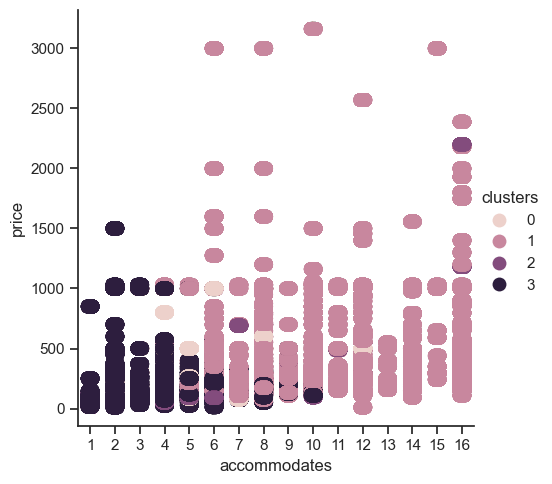

In [56]:
#Let's try it with a catplot, accommodates vs price
sns.set(style="ticks")
occupants = sns.catplot(x='accommodates', y='price', hue='clusters', data=df_final, s=100)
plt.show()

This plot shows something similar. Cluster 1 is more likely to accommodate more people and has the highest prices. Cluster 3 has the lower prices and accommodates fewer people.

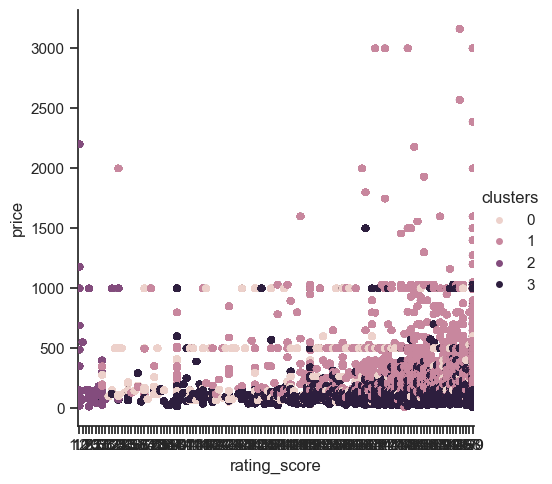

In [60]:
#Let's try price vs rating_score
sns.set(style="ticks")
occupants = sns.catplot(x='rating_score', y='price', hue='clusters', data=df_final)
plt.show()

Ratings are clustered near the top. However, we do see that cluster 1 still has the highest prices.

**#05 Descriptive statistics and interpretation**

In [64]:
#First, categorizing clusters by color
df_final.loc[df_final['clusters'] == 3, 'cluster'] = 'midnight purple'
df_final.loc[df_final['clusters'] == 2, 'cluster'] = 'plum'
df_final.loc[df_final['clusters'] == 1, 'cluster'] = 'rose'
df_final.loc[df_final['clusters'] == 0, 'cluster'] = 'pale pink'

/var/folders/dt/_2cmd91j32bgtvjmx8m320w40000gn/T/ipykernel_2494/1193783311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[df_final['clusters'] == 3, 'cluster'] = 'midnight purple'


In [66]:
#Calculating descriptive stats
df_final.groupby('cluster').agg({'beds':['mean', 'median'], 
                         'accommodates':['mean', 'median'], 
                         'price':['mean', 'median'],
                          'rating_score':['mean', 'median']})

beds        accommodates              price         \
                     mean median         mean median        mean median   
cluster                                                                   
midnight purple  1.551230    1.0     3.259426    3.0  131.467131  100.0   
pale pink        2.101449    2.0     4.374741    4.0  233.260870  144.0   
plum             1.960784    1.0     4.764706    4.0  323.784314  125.0   
rose             5.081059    4.0     9.526895    8.0  414.180233  300.0   

                rating_score         
                        mean median  
cluster                              
midnight purple     4.806095   4.88  
pale pink           4.637060   4.75  
plum                2.126471   2.00  
rose                4.806591   4.88

According to these stats, my hypothesis appears correct. Cluster 1 (rose) has the highest average number of beds and amount of guests accommodated, and it also has the highest average price and ratings. So the more people accommodated by a listing, the more it will cost to book. 